In [3]:
import pandas as pd
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

# 1. Load data and clean column names
url = "https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip().str.lower()  

#Create control and treatment dfs
control = df[df.version == "gate_30"]
treatment = df[df.version == "gate_40"]

control_retained = control.retention_1.sum()
control_total = len(control)

treatment_retained = treatment.retention_1.sum()
treatment_total = len(treatment)

#Create model
with pm.Model() as model:
    # Priors - no prior preference 
    p_control = pm.Beta("p_control", alpha=1, beta=1)
    p_treatment = pm.Beta("p_treatment", alpha=1, beta=1)

    # Likelihoods
    control_obs = pm.Binomial("control_obs", n=control_total, p=p_control, observed=control_retained)
    treatment_obs = pm.Binomial("treatment_obs", n=treatment_total, p=p_treatment, observed=treatment_retained)

    # Difference in proportions
    delta = pm.Deterministic("delta", p_treatment - p_control)

    # Sample from posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=False, progressbar=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_control, p_treatment]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


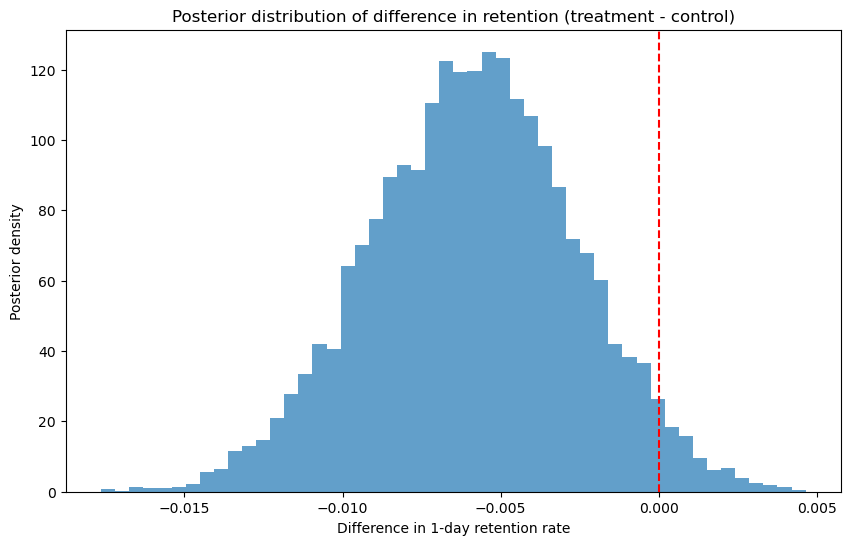

In [5]:
# Plot posterior distributions
plt.figure(figsize=(10, 6))
plt.hist(trace['delta'], bins=50, density=True, alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title("Posterior distribution of difference in retention (treatment - control)")
plt.xlabel("Difference in 1-day retention rate")
plt.ylabel("Posterior density")
plt.show()


In [6]:
#evaluating 7 day retention 

#Create control and treatment dfs

control_retained_7 = control.retention_7.sum()
control_total_7 = len(control)

treatment_retained_7 = treatment.retention_7.sum()
treatment_total_7 = len(treatment)

#Create model
with pm.Model() as model_7:
    # Priors - no prior preference 
    p_control_7 = pm.Beta("p_control_7", alpha=1, beta=1)
    p_treatment_7 = pm.Beta("p_treatment_7", alpha=1, beta=1)

    # Likelihoods
    control_obs_7 = pm.Binomial("control_obs_7", n=control_total_7, p=p_control_7, observed=control_retained_7)
    treatment_obs_7 = pm.Binomial("treatment_obs_7", n=treatment_total_7, p=p_treatment_7, observed=treatment_retained_7)

    # Difference in proportions
    delta_7 = pm.Deterministic("delta_7", p_treatment_7 - p_control_7)

    # Posterior sampling
    trace_7 = pm.sample(2000, tune=1000, return_inferencedata=False, progressbar=True)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_control_7, p_treatment_7]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


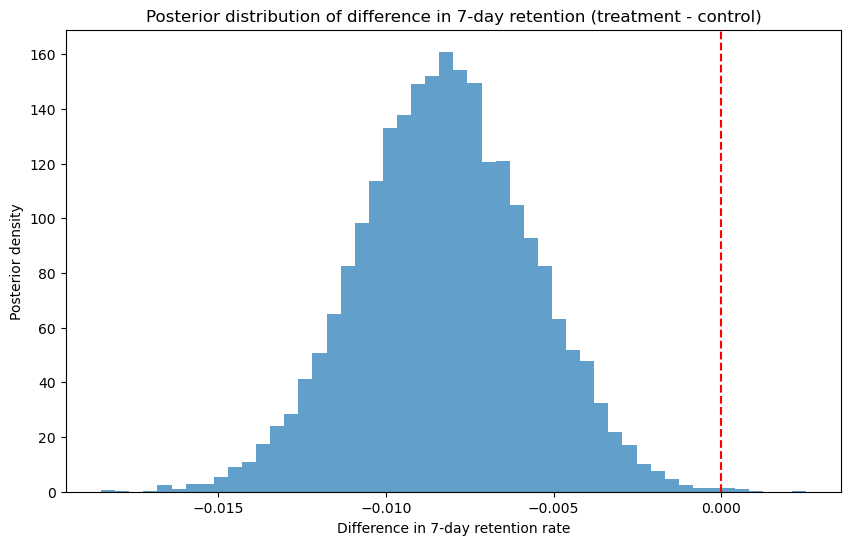

In [7]:
# Histogram of the posterior difference (delta_7)
plt.figure(figsize=(10, 6))
plt.hist(trace_7['delta_7'], bins=50, density=True, alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title("Posterior distribution of difference in 7-day retention (treatment - control)")
plt.xlabel("Difference in 7-day retention rate")
plt.ylabel("Posterior density")
plt.show()

In [8]:
print("Probability treatment is better (retention_7):", (trace_7['delta_7'] > 0).mean())
print("Probability control is better (retention_7):", (trace_7['delta_7'] < 0).mean())

Probability treatment is better (retention_7): 0.001125
Probability control is better (retention_7): 0.998875


Addressing quiz questions.

1. What was the effect of moving the gate from level 30 to level 40 on 1-day retention rates?

Moving the gate to level 40 caused a small drop in the number of players who came back the next day. The difference was only about 0.6 percentage points, but the data suggests that players with the gate at level 30 were slightly more likely to return after one day.

2. What was the effect of moving the gate from level 30 to level 40 on 7-day retention rates?

3. 
The drop in retention was also seen after 7 days. Players with the gate at level 30 were more likely to return a week later than those with the gate at level 40. So the change seemed to have a slightly negative effect on longer-term engagement too.

4. What was the biggest challenge for you in completing this assignment?
The biggest challenge was learning how to build the Bayesian model using PyMC and making sure I understood how to interpret the results. It was also a little tricky at first to know which type of probability model to use and how to explain what the results meant in plain language.